<h1 style='color:crimson'>Client-Focused Research Questions, Hypotheses 1, and Indicators (Jennifer Montgomery)</h1>

<h3 color='seagreen">Applying the EDA Workflow to Hypothesis 1</h3>

<h2 style='color:darkblue'>Hypothesis 1:</h2>

 Renovated Houses with Higher Grades Sell for Significantly Higher Prices than Unrenovated Ones

💡 Statement: Renovated houses with higher grades (8 or above) tend to have a higher market value compared to their unrenovated counterparts in the same area.

Why It Matters: 

Jennifer is looking for resale-ready houses that are already renovated. This will test whether renovated houses truly command a premium price in the market, which is important for her investment strategy.

Indicators:

1. renovated → not renovated
2. grade
3. price

<h2 style='color:darkblue'>Testing Methods:</h2>

1. Grouped Bar Chart of Sale Prices: A visual comparison between renovated and unrenovated houses to observe the price difference.

2. T-test or ANOVA: Perform statistical tests to determine if there's a significant difference in mean sale prices between renovated and unrenovated houses.

3. Regression Model with Renovation as a Feature: Build a regression model where renovation status is one of the key variables to see how much renovation influences the sale price, adjusting for other factors like size, location, etc.

<h3 style='color:seagreen'>Import packages</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h3 style='color:seagreen'>Fetch data from king country house table<h3>

In [2]:
# Load your dataset
df_houses = pd.read_csv('../data/king_country_house_data_index_false.csv')

<h3 style='color:seagreen'>check all empty field's total before interpolate</h3>

In [3]:
df_houses.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [4]:
print(df_houses['yr_renovated'].isnull().sum())
print(df_houses['waterfront'].isnull().sum())
print(df_houses['view'].isnull().sum())
print(df_houses['sqft_basement'].isnull().sum())

3848
2391
63
452


<h3 style='color:seagreen'> Interpolate Missing Values in Specific Columns</h3>

In [5]:
# Interpolate missing values in 'price', 'yr_renovated', 'grade', and 'waterfront'
df_houses['yr_renovated'] = df_houses['yr_renovated'].interpolate(method='linear')
df_houses['waterfront'] = df_houses['waterfront'].interpolate(method='linear')
df_houses['view'] = df_houses['view'].interpolate(method='linear')
df_houses['sqft_basement'] = df_houses['sqft_basement'].interpolate(method='linear')

In [6]:
# Display the first row where 'waterfront' is NaN
print(df_houses[df_houses['waterfront'].isnull()].head(1).to_string())

           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15        date     price
0  7129300520       3.0        1.0       1180.0    5650.0     1.0         NaN   0.0          3      7      1180.0            0.0      1955           0.0    98178  47.5112 -122.257         1340.0      5650.0  2014-10-13  221900.0


In [7]:
# Fill any remaining NaN values in 'waterfront' with the most frequent value
df_houses['waterfront'].fillna(df_houses['waterfront'].mode()[0], inplace=True)

/tmp/ipykernel_710295/734926959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_houses['waterfront'].fillna(df_houses['waterfront'].mode()[0], inplace=True)


In [8]:
# Display the first row where 'waterfront' is NaN
print(df_houses[df_houses['waterfront'].isnull()].head(1).to_string())

Empty DataFrame
Columns: [id, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, date, price]
Index: []


In [9]:
df_houses.isnull().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

<h3 style='color:seagreen'>Create New Columns Indicating Renovation Status, Waterfront Status, and Grade Category</h3>

In [10]:
# Create a new column to indicate renovation status
df_houses['renovated'] = df_houses['yr_renovated'].apply(lambda x: 'Renovated' if x != 0 else 'Not Renovated')

# View sample of each group
print(df_houses['renovated'].value_counts())

# Create a new column to indicate waterfront status
df_houses['waterfront_status'] = df_houses['waterfront'].apply(lambda x: 'Waterfront' if x == 1 else 'Non-Waterfront')

# Optionally group grades: Low (1-6), Mid (7-8), High (9+)
grade_order = ['Low (1-5)', 'Mid (6-8)', 'High (8+)']
df_houses['grade_category'] = df_houses['grade'].apply(lambda g: 'High (8+)' if g >= 8 else 'Mid (6-8)' if g >= 6 else 'Low (1-5)')

renovated
Not Renovated    20527
Renovated         1070
Name: count, dtype: int64


In [11]:
# Show the first 5 rows
print(df_houses.head().to_string())

# Show the last 5 rows
print(df_houses.tail().to_string())

           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15        date     price      renovated waterfront_status grade_category
0  7129300520       3.0       1.00       1180.0    5650.0     1.0         0.0   0.0          3      7      1180.0            0.0      1955           0.0    98178  47.5112 -122.257         1340.0      5650.0  2014-10-13  221900.0  Not Renovated    Non-Waterfront      Mid (6-8)
1  6414100192       3.0       2.25       2570.0    7242.0     2.0         0.0   0.0          3      7      2170.0          400.0      1951       19910.0    98125  47.7210 -122.319         1690.0      7639.0  2014-12-09  538000.0      Renovated    Non-Waterfront      Mid (6-8)
2  5631500400       2.0       1.00        770.0   10000.0     1.0         0.0   0.0          3      6       770.0            0.0      1933        9955.0    98028  47.737

In [12]:
df_houses.to_csv("../data/king_country_house_data_index_false_filter.csv")
df_houses_filter = pd.read_csv("../data/king_country_house_data_index_false_filter.csv")
df_houses_filter

,Unnamed: 0,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,renovated,waterfront_status,grade_category
0,0,7129300520,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3,...,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,Not Renovated,Non-Waterfront,Mid (6-8)
1,1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,Renovated,Non-Waterfront,Mid (6-8)
2,2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,...,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,Renovated,Non-Waterfront,Mid (6-8)
3,3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,Not Renovated,Non-Waterfront,Mid (6-8)
4,4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,Not Renovated,Non-Waterfront,High (8+)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,...,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,Not Renovated,Non-Waterfront,High (8+)
21593,21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,...,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,Not Renovated,Non-Waterfront,High (8+)
21594,21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,...,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,Not Renovated,Non-Waterfront,Mid (6-8)
21595,21595,291310100,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3,...,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,Not Renovated,Non-Waterfront,High (8+)


<h3 style='color:seagreen'> Research Questions 1 </h3>

 Average Sale Price by Renovation Status:

You created a bar chart comparing average sale prices between:

Renovated houses

Not Renovated houses

<h3 style='color:seagreen'>compare renovated houses vs not renovated houses

713202.870093458
531283.579042237


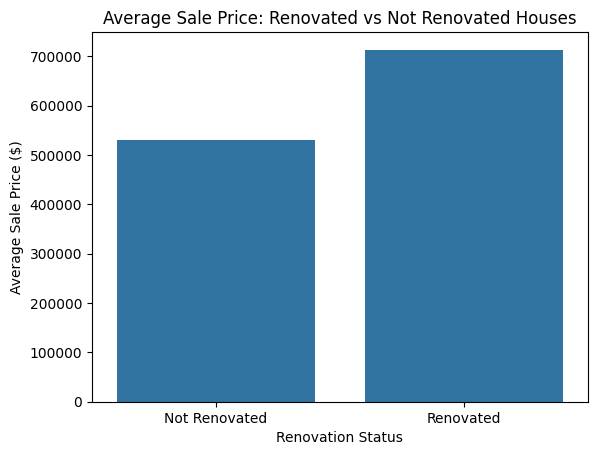

In [13]:
# Group by 'renovated' and calculate mean 'price' for each group
mean_prices = df_houses_filter.groupby('renovated')['price'].mean().reset_index()

print(df_houses_filter[df_houses['renovated'] == 'Renovated']['price'].mean())
print(df_houses_filter[df_houses['renovated'] == 'Not Renovated']['price'].mean())

# Plot the barplot
sns.barplot(data=mean_prices, x='renovated', y='price')

# Add labels and title
plt.title('Average Sale Price: Renovated vs Not Renovated Houses')
plt.ylabel('Average Sale Price ($)')
plt.xlabel('Renovation Status')

# Show plot
plt.show()

<h3 style='color:seagreen'>📌 Findings:</h3>

Renovated houses have a notably higher average price.

This supports the initial idea that renovations do increase market value.

<h3 style='color:seagreen'>Research Questions 2</h3>

Average Sale Price by Grade Category:

You categorized grades into:

Low (1–5)

Mid (6–8)

High (8+)

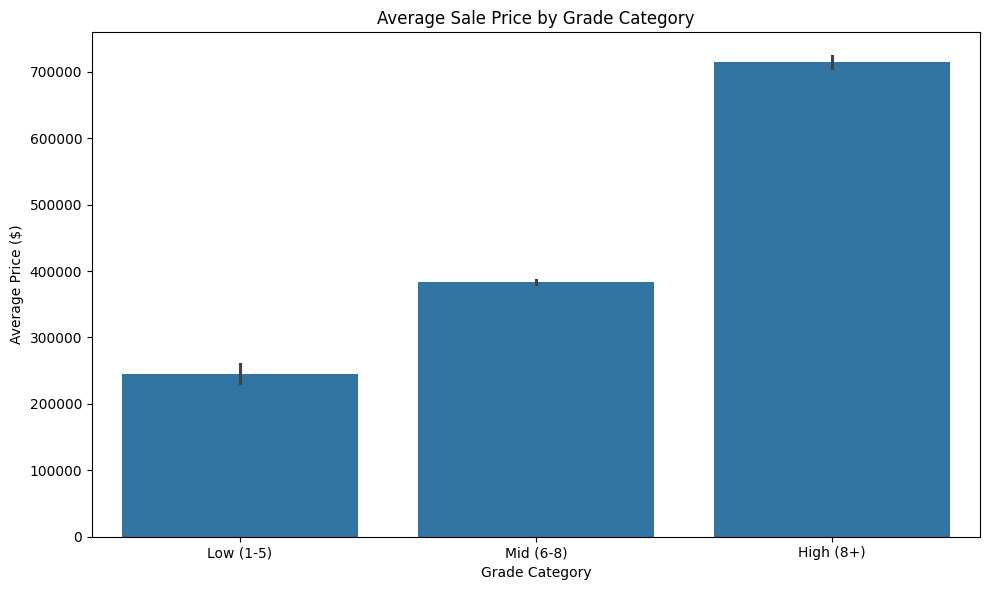

In [14]:
# Assuming df_houses is your dataframe with the relevant data

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_houses_filter, x='grade_category', y='price', order =grade_order)
plt.title('Average Sale Price by Grade Category')
plt.ylabel('Average Price ($)')
plt.xlabel('Grade Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h3 style='color:seagreen'> 📌 Findings:</h3>
A clear positive relationship between house grade and price.

high-grade homes tend to sell for more than low-grade renovated ones.

<h3 style='color:seagreen'>Research Questions 3</h3>

Average Sale Price by Renovation + Grade Category (Grouped Bar Chart):

This combined chart is the most insightful:

For High (8+) grade houses, renovated ones sell for the highest prices overall.

In the Mid (6–8) range, renovation still results in a visible price increase.

For Low (1–5) grades, the effect of renovation is smaller or inconsistent (possibly because buyers may not value renovations on lower-grade homes as highly).

/tmp/ipykernel_710295/2852839723.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_houses_filter.groupby(['grade_category', 'renovated'])['price'].mean().reset_index()


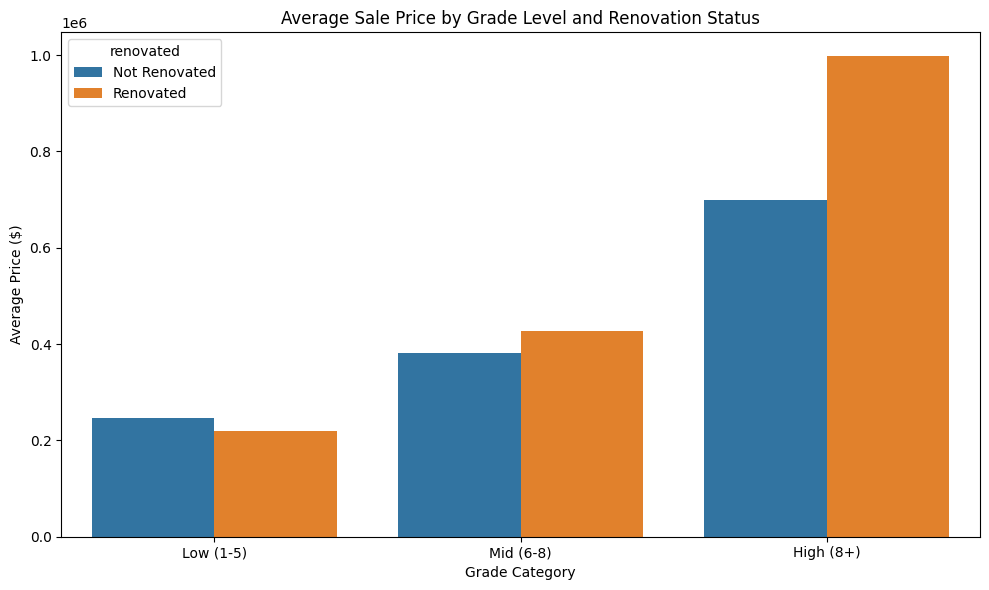

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize grade
df_houses_filter['grade_category'] = df_houses_filter['grade'].apply(
    lambda g: 'High (8+)' if g >= 8 else 'Mid (6-8)' if g >= 6 else 'Low (1-5)'
)

# Convert to categorical type with desired order
df_houses_filter['grade_category'] = pd.Categorical(df_houses_filter['grade_category'], categories=grade_order, ordered=True)

# Group and calculate average price
grouped = df_houses_filter.groupby(['grade_category', 'renovated'])['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x='grade_category',
    y='price',
    hue='renovated',
    order=grade_order
)
plt.title('Average Sale Price by Grade Level and Renovation Status')
plt.ylabel('Average Price ($)')
plt.xlabel('Grade Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<h3 style='color:seagreen'> 📌 Findings:</h3>

Hypothesis Validated: Renovated homes, especially those with higher grades (8+), do sell for significantly higher prices.

Grade Amplifies Renovation Value: Renovation on already high-grade homes magnifies their value in the market.

<h3 style='color:seagreen'>Distribution of House Sale Prices

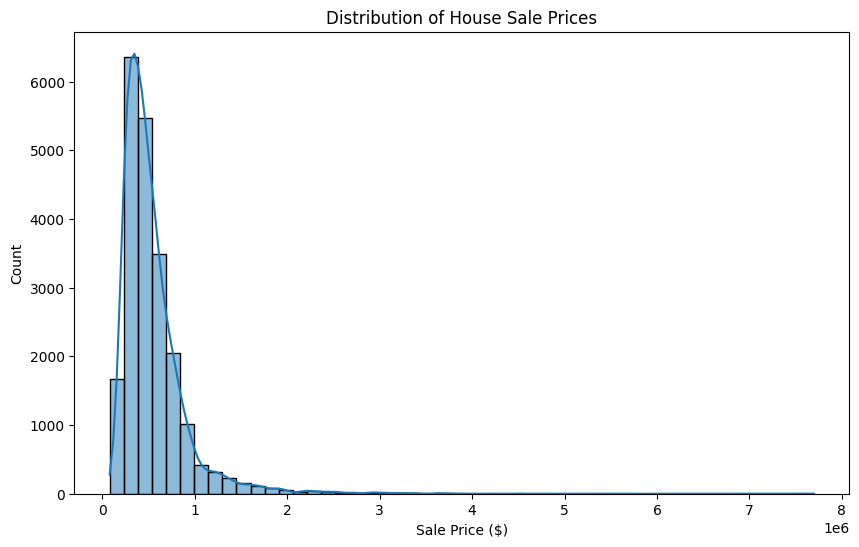

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_houses_filter['price'], kde=True, bins=50)
plt.title('Distribution of House Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Count')
plt.show()


<h3 style='color:seagreen'> T-test 

In [17]:
from scipy.stats import ttest_ind
import numpy as np

# Create log_price if not already done
df_houses_filter['log_price'] = np.log(df_houses_filter['price'])

# Split into two groups
renovated = df_houses_filter[df_houses_filter['renovated'] == 'Renovated']['log_price']
not_renovated = df_houses_filter[df_houses_filter['renovated'] == 'Not Renovated']['log_price']

print(renovated,not_renovated)

# Perform independent T-test
t_stat, p_val = ttest_ind(renovated, not_renovated, equal_var=False)

print(f"T-test Results:\nT-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")


1        13.195614
2        12.100712
35       13.453105
95       13.715690
103      13.901688
           ...    
20428    13.122387
20429    12.812436
20431    12.785488
20432    13.287878
20946    11.608236
Name: log_price, Length: 1070, dtype: float64 0        12.309982
3        13.311329
4        13.142166
5        14.022525
6        12.458775
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: log_price, Length: 20527, dtype: float64
T-test Results:
T-statistic = 11.898, p-value = 0.00000


In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Build model
model = ols('log_price ~ C(renovated) + C(grade_category) + C(renovated):C(grade_category)', data=df_houses_filter).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                                     sum_sq       df            F  \
C(renovated)                      45.539239      1.0   242.509928   
C(grade_category)               1865.772651      2.0  4967.895823   
C(renovated):C(grade_category)    13.748575      2.0    36.607615   
Residual                        4054.422510  21591.0          NaN   

                                      PR(>F)  
C(renovated)                    2.204985e-54  
C(grade_category)               0.000000e+00  
C(renovated):C(grade_category)  1.344033e-16  
Residual                                 NaN  


Shapiro-Wilk Test Statistic=0.992, p=0.000


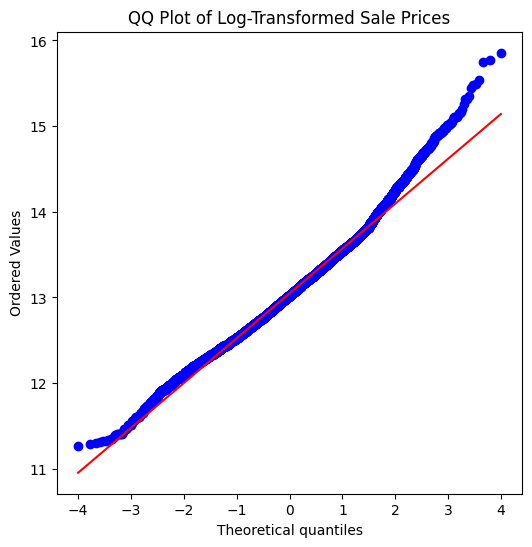

In [19]:
from scipy.stats import shapiro, probplot

# Shapiro-Wilk test
stat, p = shapiro(df_houses_filter['log_price'].sample(5000))  # sample to avoid memory issues
print('Shapiro-Wilk Test Statistic=%.3f, p=%.3f' % (stat, p))

# QQ Plot
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
stats.probplot(df_houses_filter['log_price'], dist="norm", plot=plt)
plt.title('QQ Plot of Log-Transformed Sale Prices')
plt.show()


📌 Summary:

### 🔍 Hypothesis Test: Do Renovated Homes Sell for More?

We conducted a Welch’s T-test to compare the mean log-transformed sale prices between renovated and unrenovated homes.

**T-test Result:**
- t-statistic = 11.898
- p-value = 0.00000

✅ Since p < 0.05, we reject the null hypothesis: **Renovated homes do sell for significantly more.**

We also performed a two-way ANOVA to explore the interaction between renovation and grade level.

**ANOVA Result:**
- Renovation and Grade both significantly affect sale price.
- The interaction term is significant → The impact of renovation depends on the house's grade level.


Conclusion:

Hypothesis Validated: Renovated homes, especially those with higher grades (8+), do sell for significantly higher prices.

Grade Amplifies Renovation Value: Renovation on already high-grade homes magnifies their value in the market.

Lower-Grade Renovations Yield Less ROI: For lower-grade homes, renovation does not boost price as much, which may affect profit margins.

💡 Suggestions for Jennifer Montgomery:

Target High-Grade Homes for Flip: Focus on already well-graded homes (8 or above). Renovating them appears to yield the best returns.

Avoid Investing in Low-Grade Fixer-Uppers: Renovating low-grade homes may not raise the price significantly enough to justify the renovation costs.

Use a Grade + Renovation Filter for Scouting: Implement filters that identify houses that:

Have a grade of 8+

Are already renovated or in good shape to renovate

Leverage Regression for Deeper Insights: Build a regression model to quantify how much each unit increase in grade or renovation contributes to price, controlling for other features (like location, size, etc.).

Consider Neighborhood Context: Look into whether high renovation premiums persist across different ZIP codes or neighborhoods — this can guide location-based strategies.